## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data as a data frame  

In [3]:
df_insur=pd.read_csv('insurance.csv')

In [4]:
df_insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA of the data

### a.Shape of the data

In [5]:
df_insur.shape

(1338, 7)

*As seen from above there are 7 attributes namely 

1.age
2.sex
3.bmi
4.children
5.smoker
6.region
7.charges

*The no of rows present is 1338


### b. Data type of each attribute  

In [6]:
df_insur.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

1.As seen above age,bmi,charges and children have numeric data

2.Sex,regional and smoker have categorical data hence the datatype object

### c. Checking the presence of missing values  

In [8]:
df_insur.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The command first check for null values and sums for each column

### d. 5 point summary of numerical attributes 

In [10]:
#Select all the numeric  datatypes into  a dataframe
df_ins_numeric=df_insur.select_dtypes(include='number')

In [11]:
df_ins_numeric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [12]:
df_ins_numeric.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.  

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

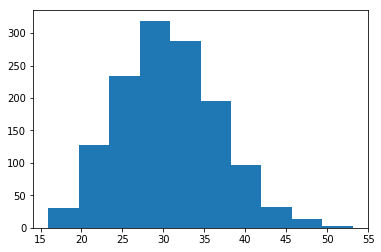

In [13]:
plt.hist(df_insur['bmi'])

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 1 Patch objects>)

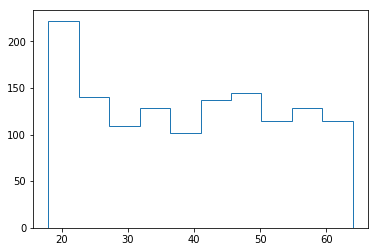

In [14]:
plt.hist(df_insur['age'],histtype='step')

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

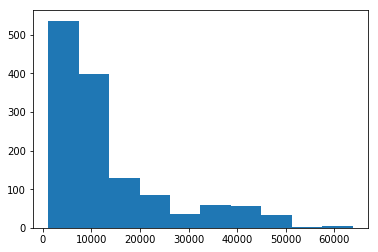

In [15]:
plt.hist(df_insur['charges'])

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns

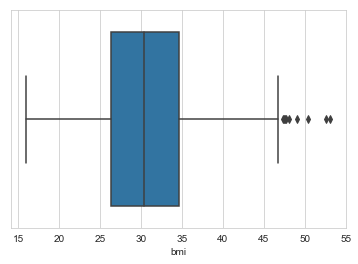

In [28]:
sns.set_style("whitegrid")
sns.boxplot(df_insur['bmi'])

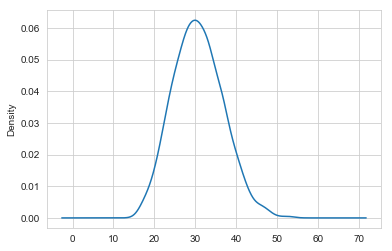

In [36]:
df_insur['bmi'].plot(kind='kde')

As seen the data is not skewed for bmi .

Also note there are oultiers for bmi

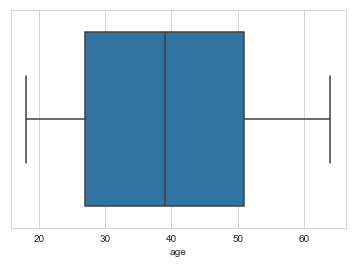

In [29]:
sns.set_style("whitegrid")
sns.boxplot(df_insur['age'])

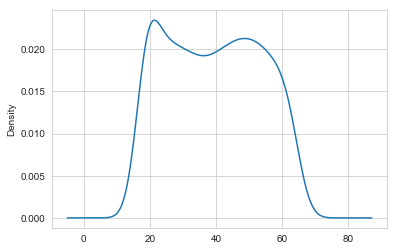

In [35]:
df_insur['age'].plot(kind='kde')

As seen from the plot the data is not skewed for age.

Also note there are no oultiers for age.


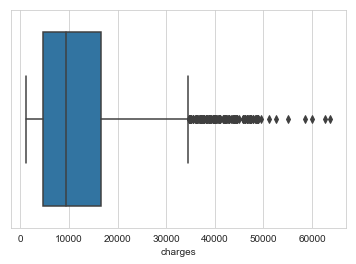

In [31]:
sns.set_style("whitegrid")
sns.boxplot(df_insur['charges'])

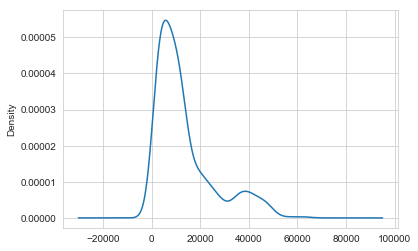

In [34]:
df_insur['charges'].plot(kind='kde')

As seen data for charges are right skewed and also outliers are present

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns 

As shown using boxplot outliers are present for charges and bmi columns.

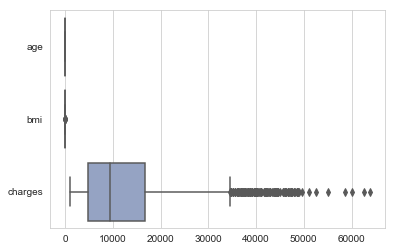

In [52]:
sns.boxplot(data=df_insur[['age','bmi','charges']], orient="h", palette="Set2")

We get the above as the charges values are extremely huge as compared to age and bmi.One way to plot all the values in a single plot is to standarize using zscore

In [57]:
from  scipy.stats import zscore
#standarize each columns
df_ins_numeric=df_ins_numeric.drop('children',axis=1)
df_ins_z_score=df_ins_numeric.apply(zscore)

In [58]:
df_ins_z_score.head()

,age,bmi,charges
0,-1.438764,-0.453320,0.298584
1,-1.509965,0.509621,-0.953689
2,-0.797954,0.383307,-0.728675
3,-0.441948,-1.305531,0.719843
4,-0.513149,-0.292556,-0.776802


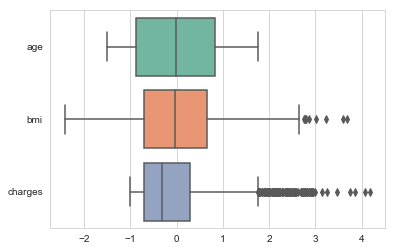

In [59]:
sns.boxplot(data=df_ins_z_score, orient="h", palette="Set2")

Now we can see that bmi and charges have both outliers.

### h. Distribution of categorical columns (include  children)  

In [45]:
#Select all the categorical  datatypes into  a dataframe
df_ins_categ=df_insur.select_dtypes(include='object')
df_ins_categ['children']=df_insur['children']

C:\Users\PYTHON\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
df_ins_categ.head()

,sex,smoker,region,children
0,female,yes,southwest,0
1,male,no,southeast,1
2,male,no,southeast,3
3,male,no,northwest,0
4,male,no,northwest,0


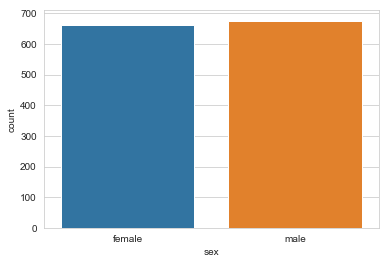

In [47]:
sns.countplot(df_ins_categ.iloc[:,0])

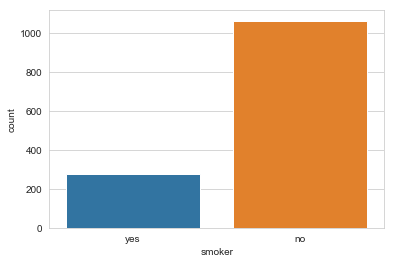

In [43]:
sns.countplot(df_ins_categ.iloc[:,1])

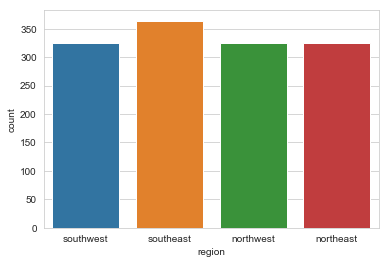

In [44]:
sns.countplot(df_ins_categ.iloc[:,2])

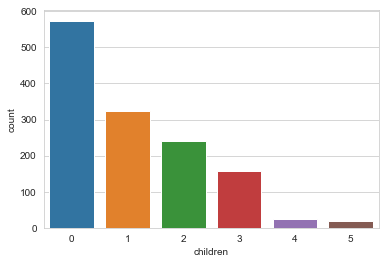

In [48]:
sns.countplot(df_ins_categ.iloc[:,3])

OBSERVATION:
    1. The sex columns has 2 value :- male and female with the distribution of male slightly more than female.Hence this dataset when used for model will predict better for male datapoint.
    2. The smoker also has 2 values-no and yes.As seen lesser no of smokers present.
    3. There are 4 region:-northeast,northwest,southeast,southwest.
    4. The children columns valoue range from 0-5.

### i. Pair plot that includes all the columns of the data  frame

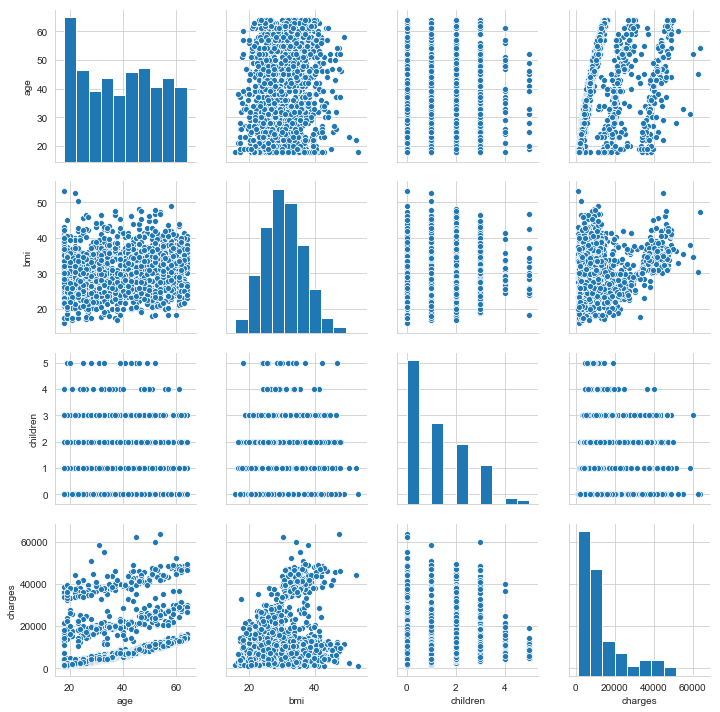

In [49]:
sns.pairplot(df_insur)

### Q1.Do charges of people who smoke differ significantly  from the people who don't?  

In [7]:
df_smoker=df_insur[df_insur['smoker']=='yes']['charges']
df_smoker.size

274

In [8]:
df_non_smoker=df_insur[df_insur['smoker']=='no']['charges']
df_non_smoker.size

1064

In [9]:
from scipy.stats import ttest_ind
ttest_ind(df_non_smoker, df_smoker)

Ttest_indResult(statistic=-46.664921172723716, pvalue=8.271435842177219e-283)

The pvalue is very low hence we csn the distribution of charges for non smokers are significantly diffferent from that of smokers

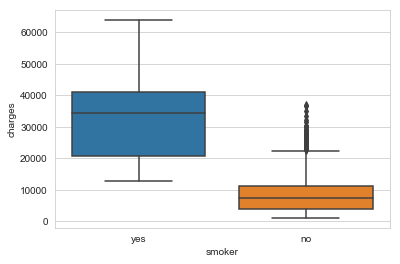

In [61]:
sns.boxplot(y='charges',x='smoker',data=df_insur)

As Shown the median for charges of non smoker is significantly very less as compared to smokers

### Q2. Does bmi of males differ significantly from that of  females?  

In [6]:
df_female=df_insur[df_insur['sex']=='female']['bmi']
df_female.size

662

In [11]:
df_male=df_insur[df_insur['sex']=='male']['bmi']
df_male.size

676

In [12]:
from scipy.stats import ttest_ind
ttest_ind(df_female, df_male)

Ttest_indResult(statistic=-1.696752635752224, pvalue=0.08997637178984932)

The pvalue is close to 0.05 and hence we can conclude that the distribution of bmi for male is similar to that of female.

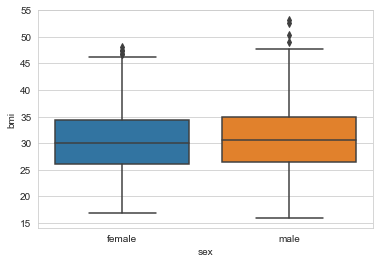

In [62]:
sns.boxplot(y='bmi',x='sex',data=df_insur)

Also from the plot we can conclude the difference in bmi for male and female is not much significant

 ### Q3.Is the proportion of smokers significantly different  in different genders?  

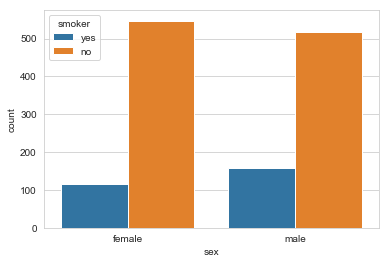

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='sex',hue='smoker',data=df_insur)

In [22]:
#chi Test
import scipy.stats as stats
chi_result=pd.crosstab(df_insur['sex'],df_insur['smoker'])
chi,p_value,dof,expected=stats.chi2_contingency(chi_result)
print('p_value',p_value)

p_value 0.006548143503580696


### In this example, p value is 0.00655 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in count of smokers between male and female.

In [24]:
#Another way of getting to know the count of the smokers can be caluclated 
#for each of the gender
df_male_smoker=df_insur[df_insur['sex'] =='male'] ['smoker'] == 'yes'
print(df_male_smoker.value_counts())
df_female_smoker=df_insur[df_insur['sex'] =='female'] ['smoker'] == 'yes'
print(df_female_smoker.value_counts())

False    517
True     159
Name: smoker, dtype: int64
False    547
True     115
Name: smoker, dtype: int64


In [17]:
#As Seen the male smokers are more with count of 159 as compared to  female smoker (115) 

As seen above more male smoker are present as compared to female smokers.

Also there are more female non smokers as compared to male non smokers.

 ### Q4. Is the distribution of bmi across women with no  children, one child and two children, the same ?

In [13]:
#fetching only female entries
df_female=df_insur[df_insur['sex']=='female']

In [25]:
#PERFORMING ONE WAY ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison    # For post-hoc Testing
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

In [26]:
formula = 'bmi ~ C(children)'
model = ols(formula, df_female).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    5.0     53.274335  10.654867  0.289914  0.918623
Residual     656.0  24109.180862  36.751800       NaN       NaN


As seen the p value is above 0.05 we can acept the null hypothesis of the mean for  the distribution of bmi for female having different children is same

## Performing T test for different combination of the children

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison    # For post-hoc Testing
mc = MultiComparison(df_female['bmi'], df_female['children'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.3089  -2.0232 1.4055 False 
  0      2     0.2883   -1.599 2.1755 False 
  0      3     0.0749  -2.1472 2.297  False 
  0      4     1.5817  -3.7411 6.9044 False 
  0      5     0.2591  -5.9511 6.4693 False 
  1      2     0.5971   -1.506 2.7002 False 
  1      3     0.3838  -2.0244 2.7919 False 
  1      4     1.8905  -3.5126 7.2936 False 
  1      5     0.568   -5.7112 6.8471 False 
  2      3    -0.2134  -2.7475 2.3208 False 
  2      4     1.2934   -4.167 6.7538 False 
  2      5    -0.0292  -6.3577 6.2994 False 
  3      4     1.5068  -4.0782 7.0917 False 
  3      5     0.1842  -6.2522 6.6206 False 
  4      5    -1.3226  -9.3737 6.7286 False 
--------------------------------------------
[0 1 2 3 4 5]


### BOX PLOT FOR THE SAME

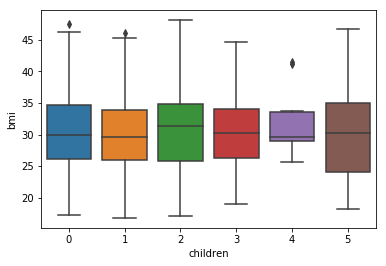

In [29]:
sns.boxplot(y='bmi',x='children',data=df_female)

The bmi for female having 0 and 1 has no significant difference and for female having 2 children has slightly more bmi.